In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import os, re
%matplotlib inline

In [43]:
from sklearn.datasets import load_iris, load_digits
d1 = pd.DataFrame(load_iris()['data'])
d2 = pd.DataFrame(load_digits()['data'])

In [61]:
###### Classes ######

# Base class
class NearestNeighbor:
    def __init__(self, data):
        self.data = data

# Random projection to smaller space, then exact algorithm
from sklearn.random_projection import GaussianRandomProjection
class RandomProjectionNeighbor(NearestNeighbor):
    def __init__(self, data, output_dim=1):
        self.output_dim = output_dim
        self.randproj = GaussianRandomProjection(n_components=output_dim)
        self.data = data
        self.new_data = self.randproj.fit_transform(data)
        
    def find_nn(self, q):
        new_q = self.randproj.fit_transform(q.reshape(1,-1))
        closest_index = distance.cdist(new_q, self.new_data).argmin()
        return self.data[closest_index]
    
# Returns random data point
class RandomNeighbor(NearestNeighbor):
    def find_nn(self, q):
        return self.data[np.random.randint(data.shape[0])]

# Returns exact answer (might be slow)
class ExactNN(NearestNeighbor):           
    def find_nn(self, q):
        closest_index = distance.cdist([q], self.data).argmin()
        return self.data[closest_index]

In [70]:
df = df.sample(frac=1)
df = df.apply(lambda x: (x - x.mean()) / (x.std() + 0.00001) )

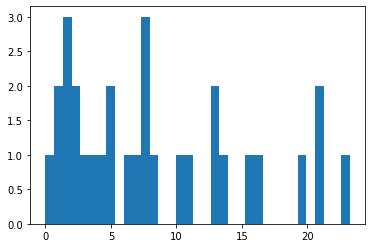

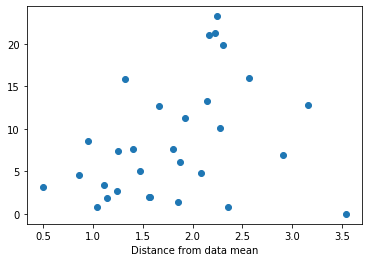

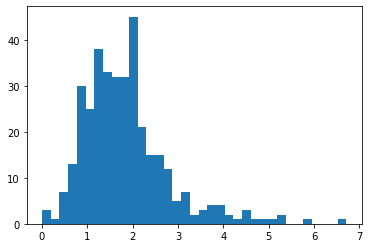

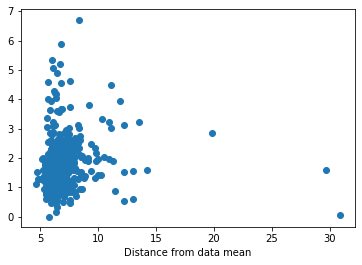

In [90]:
###### RUN EXPERIMENT ######

dataframe_list = [d1, d2]    

for df in dataframe_list:

    # Shuffle and standardize data
    df = df.sample(frac=1)
    df = df.apply(lambda x: (x - x.mean()) / x.std())
    df = df.dropna(axis=1)

    # Create data/query split - randomly select ~20% of the data for testing 
    split_point = int(0.8 * len(df))
    data = df.iloc[:split_point].values
    queries = df.iloc[split_point:].values
    
    NN = RandomProjectionNeighbor(data, output_dim=2)
    exactNN = ExactNN(data)

    outputs = []
    exacts = []
    for q in queries:
        p = NN.find_nn(q)
        outputs.append(p)
        exacts.append(exactNN.find_nn(q))
        
    ###### Evaluate Outputs ######

    dist_outputs = np.linalg.norm(np.array(queries) - np.array(outputs), axis=1)
    dist_optimal = np.linalg.norm(np.array(queries) - np.array(exacts), axis=1)
    dist_from_mean = np.linalg.norm(np.array(queries)-data.mean(0), axis=1)

    # error defined to be (output distance - optimal distance)/(optimal distance)
    error = (dist_outputs - dist_optimal)/(dist_optimal)

    plt.hist(error, bins=35), plt.show()
    plt.scatter(dist_from_mean, error);
    plt.xlabel('Distance from data mean'), plt.show();
   